In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.patches as mpatches
from datetime import datetime

In [18]:
mypath = r"Stats"
onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

In [19]:
df = pd.read_csv(os.path.join(mypath, onlyfiles[-1]))

#preprocess gametime

t = np.array(df["Time"], )
t = t.astype(datetime)

t = np.array([datetime.strptime(my_date_string, '%Y-%m-%d %H:%M:%S.%f') for my_date_string in t])

start_time = t[0]
t = t - start_time

t = np.array([int(timesince.total_seconds()) for timesince in t]) 
df["GameTime"] = t
df

,Unnamed: 0,Player,Profile,Time,Event,GameTime
0,0,test,profile1,2022-08-01 18:26:01.575793,LevelLoad,0
1,1,test,profile1,2022-08-01 18:26:01.576793,killed an enemy,0
2,2,test,profile1,2022-08-01 18:26:15.261875,enemy_hit,13
3,3,test,profile1,2022-08-01 18:26:15.935722,enemy_hit,14
4,4,test,profile1,2022-08-01 18:26:16.767788,enemy_hit,15
...,...,...,...,...,...,...
101,101,test,profile1,2022-08-01 18:26:53.975670,hp 460,52
102,102,test,profile1,2022-08-01 18:26:53.977670,armor 26,52
103,103,test,profile1,2022-08-01 18:26:53.981672,hp 460,52
104,104,test,profile1,2022-08-01 18:26:53.983672,armor 26,52


enemies killed 5


Text(0.5, 0, 'Time')

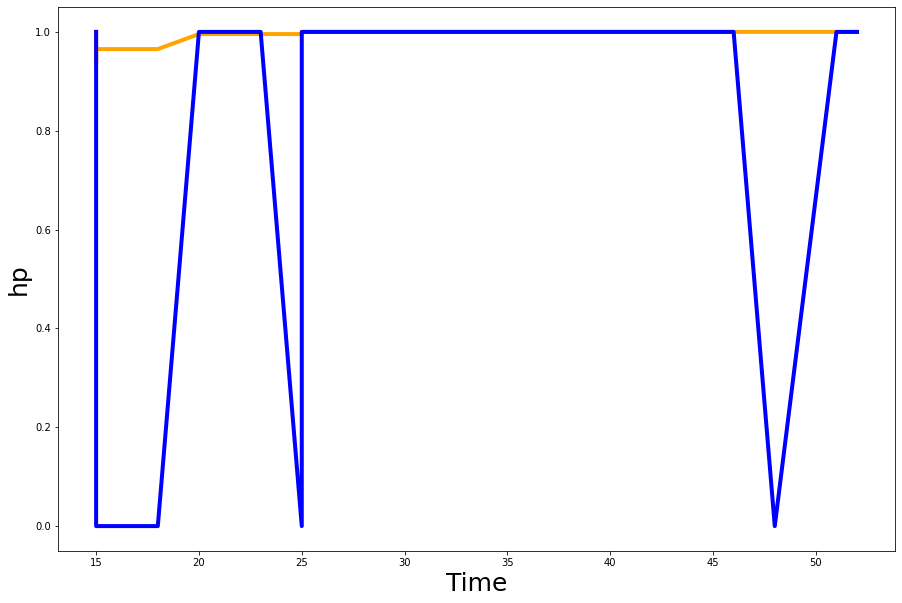

In [20]:
fig, ax=plt.subplots(figsize=(15,10))

#killed enemies
df_deaths_enemy = df.loc[df["Event"].str.contains("killed an enemy", case = False)]
#ax.scatter(df_deaths_enemy["GameTime"], np.arange(1,len(df_deaths_enemy["Time"])+1), label="Enemies killed", linewidth=2.0, color='black')


print(f"enemies killed", len(df_deaths_enemy["GameTime"]))

# player hp
df_hp = df.loc[df["Event"].str.contains("hp", case = False)]
hp = np.array([int(ev.replace("hp ","")) for ev in df_hp["Event"]])
hp_max = np.max(hp)
hp = hp/hp_max
ax.plot(df_hp["GameTime"], hp, label="hp", linewidth=4.0, color='orange')

# player armor
df_hp = df.loc[df["Event"].str.contains("armor", case = False)]
df_hp = df_hp.loc[~df_hp["Event"].str.contains("regenerate armor", case = False)]
armor = np.array([int(ev.replace("armor ","")) for ev in df_hp["Event"]])
armor_max = np.max(armor)
ax.plot(df_hp["GameTime"], armor/armor_max, label="armor", linewidth=4.0, color='blue')


#ax.plot(x,y, linewidth=10.0, color='black', label="Average", zorder=2)
ax.set_ylabel(f"hp", fontsize=25)
ax.set_xlabel(f"Time", fontsize=25)

In [21]:
events= ("enemy_hit", "enemy_headshot", "enemy_crit", "killed an enemy", "shielded hit", "unshielded hit", "auto regenerate armor")

for e in events:
    df_event = df.loc[df["Event"]==e]
    print(e, len(df_event))

enemy_hit 13
enemy_headshot 0
enemy_crit 0
killed an enemy 5
shielded hit 4
unshielded hit 1
auto regenerate armor 5


In [14]:
#player take damage
df_deaths_enemy = df.loc[df["Event"]=="shielded hit"]
for t in df_deaths_enemy["GameTime"]:
    ax.axvline(x=t, color = "blue")
#ax.scatter(df_deaths_enemy["GameTime"], np.arange(1,len(df_deaths_enemy["Time"])+1), label="Enemies killed", linewidth=2.0, color='blue')

df_deaths_enemy = df.loc[df["Event"]=="unshielded hit"]
for t in df_deaths_enemy["GameTime"]:
    ax.axvline(x=t, color = "orange")
#ax.scatter(df_deaths_enemy["GameTime"], np.arange(1,len(df_deaths_enemy["Time"])+1), label="Enemies killed", linewidth=2.0, color='orange')

df_deaths_enemy = df.loc[df["Event"]=="auto regenerate armor"]
for t in df_deaths_enemy["GameTime"]:
    ax.axvline(x=t,color = "lightblue")
#ax.scatter(df_deaths_enemy["GameTime"], np.arange(1,len(df_deaths_enemy["Time"])+1), label="Enemies killed", linewidth=2.0, color='blue')

df_deaths_enemy = df.loc[df["Event"]=="revived by ally"]
for t in df_deaths_enemy["GameTime"]:
    ax.axvline(x=t,color = "lightblue")
#ax.scatter(df_deaths_enemy["GameTime"], np.arange(1,len(df_deaths_enemy["Time"])+1), label="Enemies killed", linewidth=2.0, color='lightblue')

df_deaths_enemy = df.loc[df["Event"]=="downed"]
for t in df_deaths_enemy["GameTime"]:
    ax.axvline(x=t, color = "black")
#ax.scatter(df_deaths_enemy["GameTime"], np.arange(1,len(df_deaths_enemy["Time"])+1), label="Enemies killed", linewidth=2.0, color='black')